In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("email.csv")
df["category"] = df["Category"].str.lower().str.strip()
df["category"] = df["category"].map({"ham":0, "spam":1})

print("Valores nulos en y:", df["category"].isna().sum())

df = df.dropna(subset=["category"])

Valores nulos en y: 1


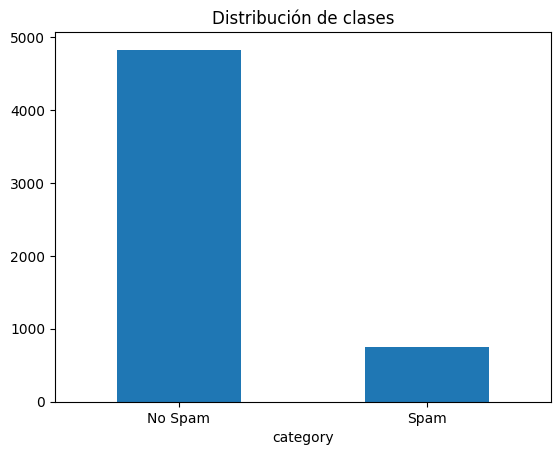

In [17]:
df["category"].value_counts().plot(kind="bar")
plt.title("Distribución de clases")
plt.xticks([0,1],["No Spam","Spam"], rotation=0)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, recall_score

X_train, X_test, y_train, y_test = train_test_split(
    df["Message"], df["category"], test_size=0.2, random_state=42
)

In [19]:
model = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [20]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       966
         1.0       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [21]:
print("Recall:", recall_score(y_test, y_pred))

Recall: 0.7583892617449665


In [24]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import StringTensorType

initial_type = [("Message", StringTensorType([None,]))]

onnx_model = convert_sklearn(model, initial_types=initial_type)

with open("spam_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())